In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_pickle('../BeijingRent.pkl')

In [58]:
df.head()

,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,livingRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,101084782030,116.475489,40.019520,1111027376244,2016-08-09,106,415.0,31680,131.00,2,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,101086012217,116.453917,39.881534,1111027381879,2016-07-28,126,575.0,43436,132.38,2,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,101086041636,116.561978,39.877145,1111040862969,2016-12-11,48,1030.0,52021,198.00,3,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,101086406841,116.438010,40.076114,1111043185817,2016-09-30,138,297.5,22202,134.00,3,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,101086920653,116.428392,39.886229,1111027381174,2016-08-28,286,392.0,48396,81.00,2,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [59]:
data = pd.DataFrame({
    'id':df['id'],
    'time': df['tradeTime'],
    'price_per_square':df['price'],
    'square':df['square'],
    'total_price':df['totalPrice']
}).set_index('id')


In [60]:
data['time_by_year'] = data['time'].dt.to_period('Y')
data['time_by_month'] = data['time'].dt.to_period('M')

In [61]:
# 绘制每年的平均销售额
data1 = data.groupby(by='time_by_year')['total_price'].agg(
    total_sum='sum', # 总和
    total_count='count', # 计数
    average = 'mean', # 平均值
).reset_index()

In [62]:
data1['time_by_year'] = data1['time_by_year'].astype(str)

In [93]:
custom_palette = sns.color_palette("Set2", n_colors=8)

Text(0.5, 1.0, 'Count By Year')

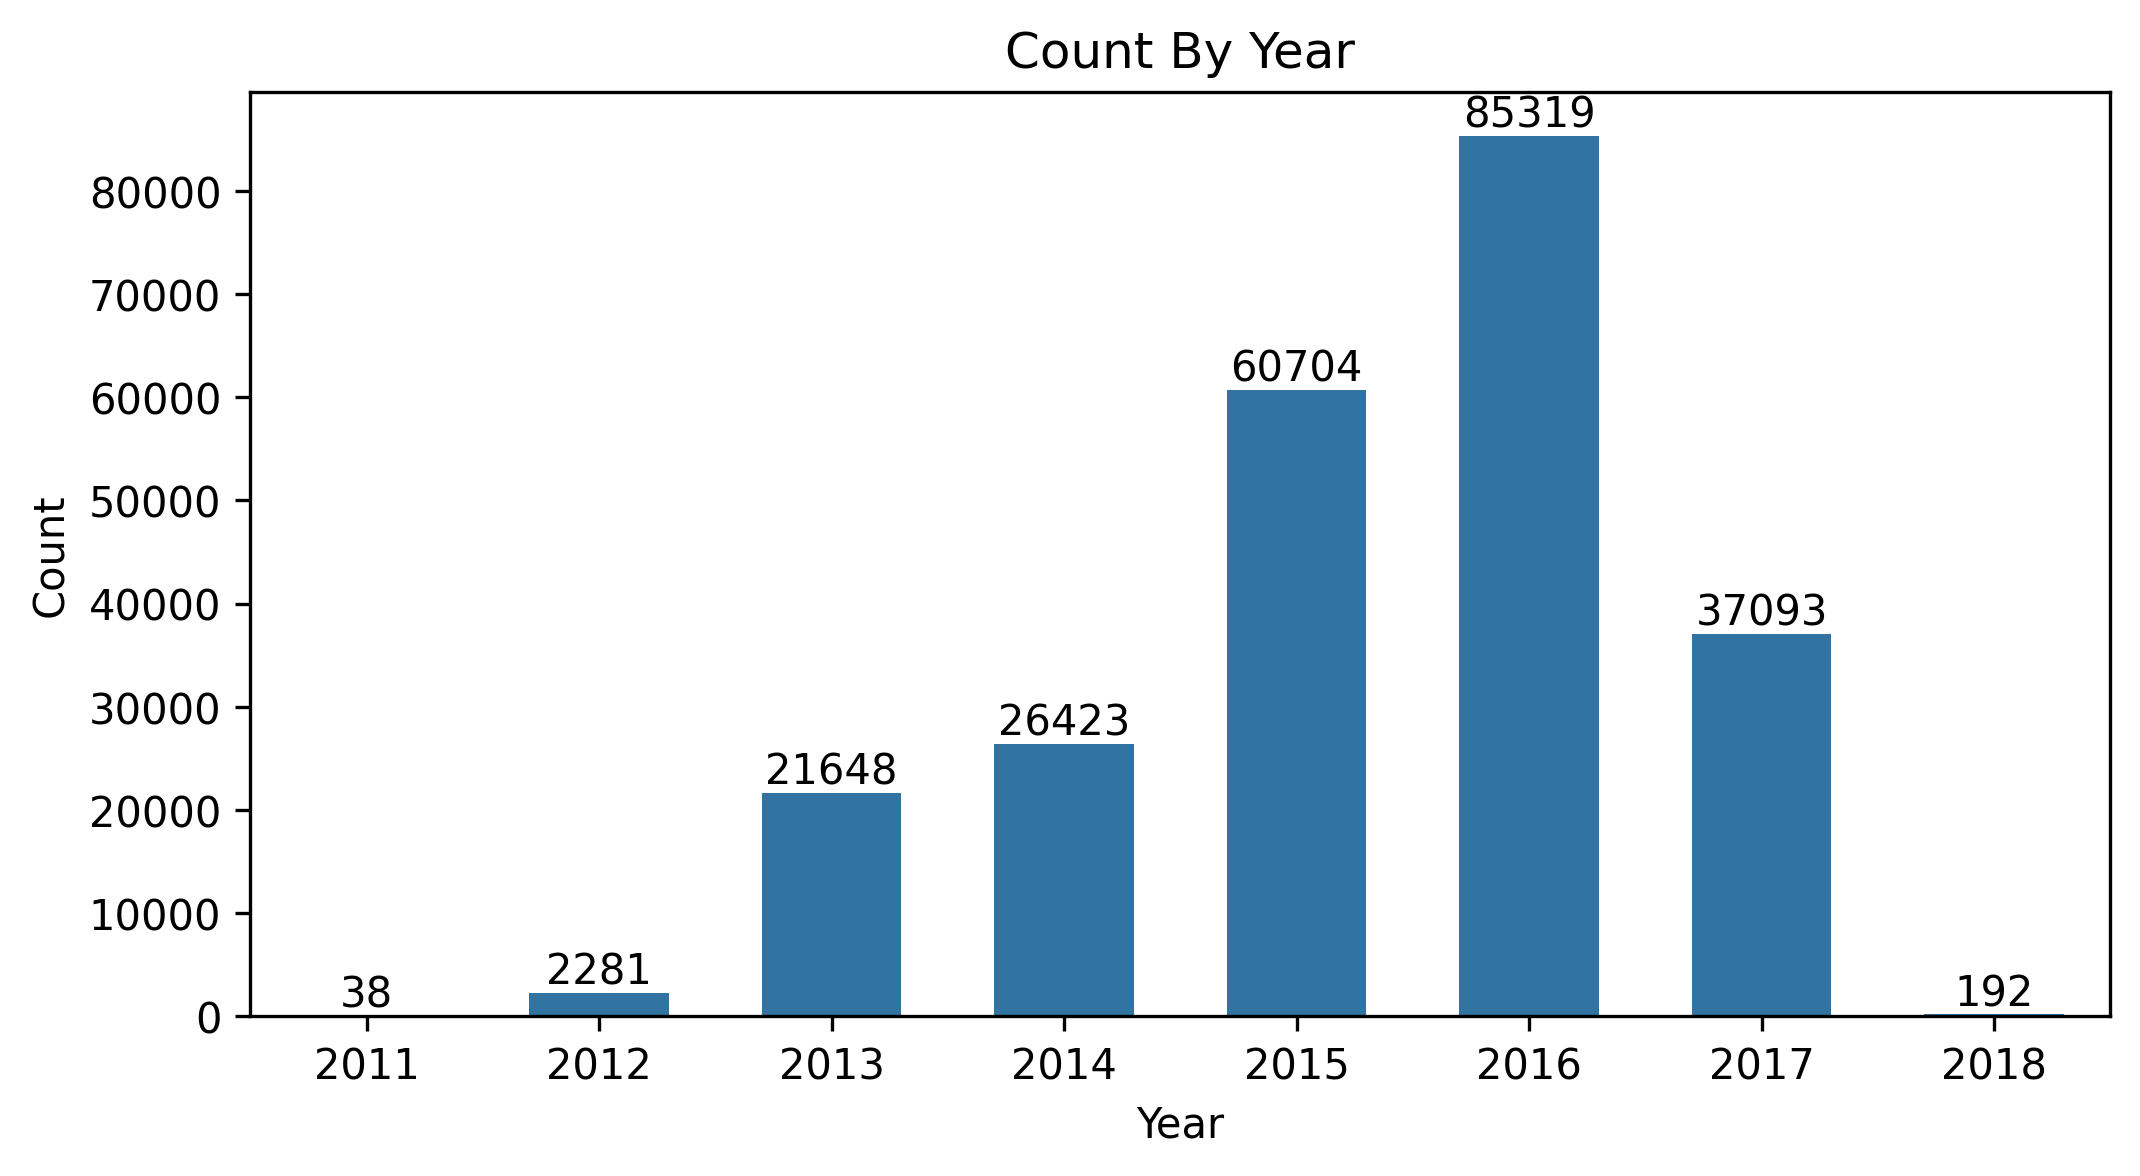

In [125]:
plt.figure(figsize=(8, 4),dpi=300)
bars = sns.barplot(data=data1, 
            x='time_by_year', 
            y='total_count',
            width=0.6)
for bar in bars.patches:
    height = bar.get_height()
    # effective_value = f'{height:.1e}'.split('e')[0]
    bars.annotate(f'{height:.0f}',
                  (bar.get_x() + bar.get_width()/2, height),
                  ha='center', va = 'bottom')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count By Year')

Text(0.5, 1.0, 'Average Sales By Year')

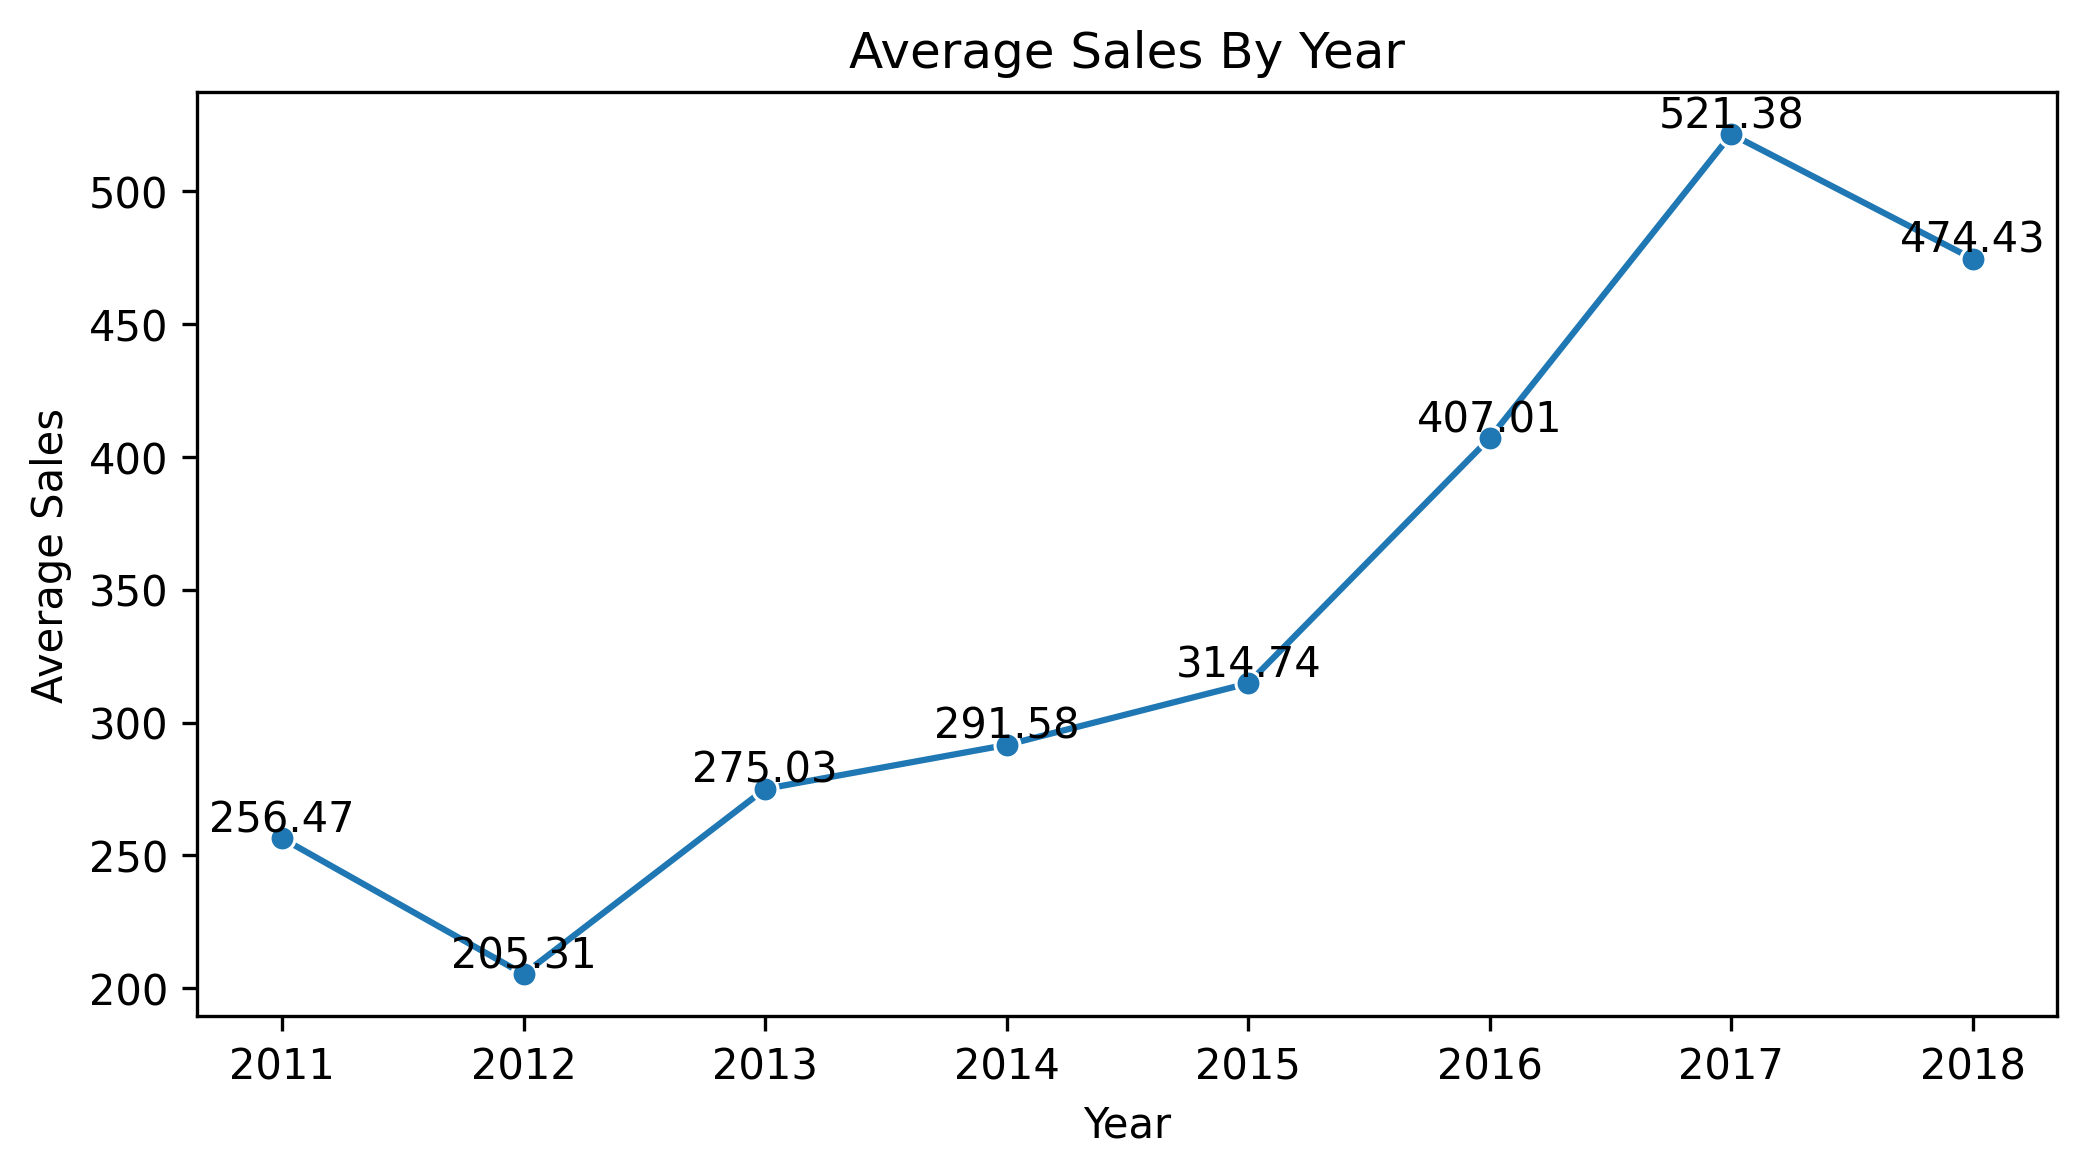

In [126]:
plt.figure(figsize=(8, 4), dpi=300)
lineplots = sns.lineplot(x='time_by_year',
                         y='average',
                         data=data1,
                         linestyle='-',
                         marker='o',
                         markersize = 6,)
for x,y in zip(data1['time_by_year'], data1['average']):
    plt.text(x, y+15, f'{y:.2f}', fontsize = 10, ha='center', va='top',color = 'black')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.title('Average Sales By Year')

In [147]:
data2 = data.groupby(by=['time_by_month'])['total_price'].agg(
    total_sum='sum', # 总和
    total_count='count', # 计数
    average = 'mean', # 平均值
).reset_index()

In [148]:
data2['time_by_month'] = data2['time_by_month'].astype(str)

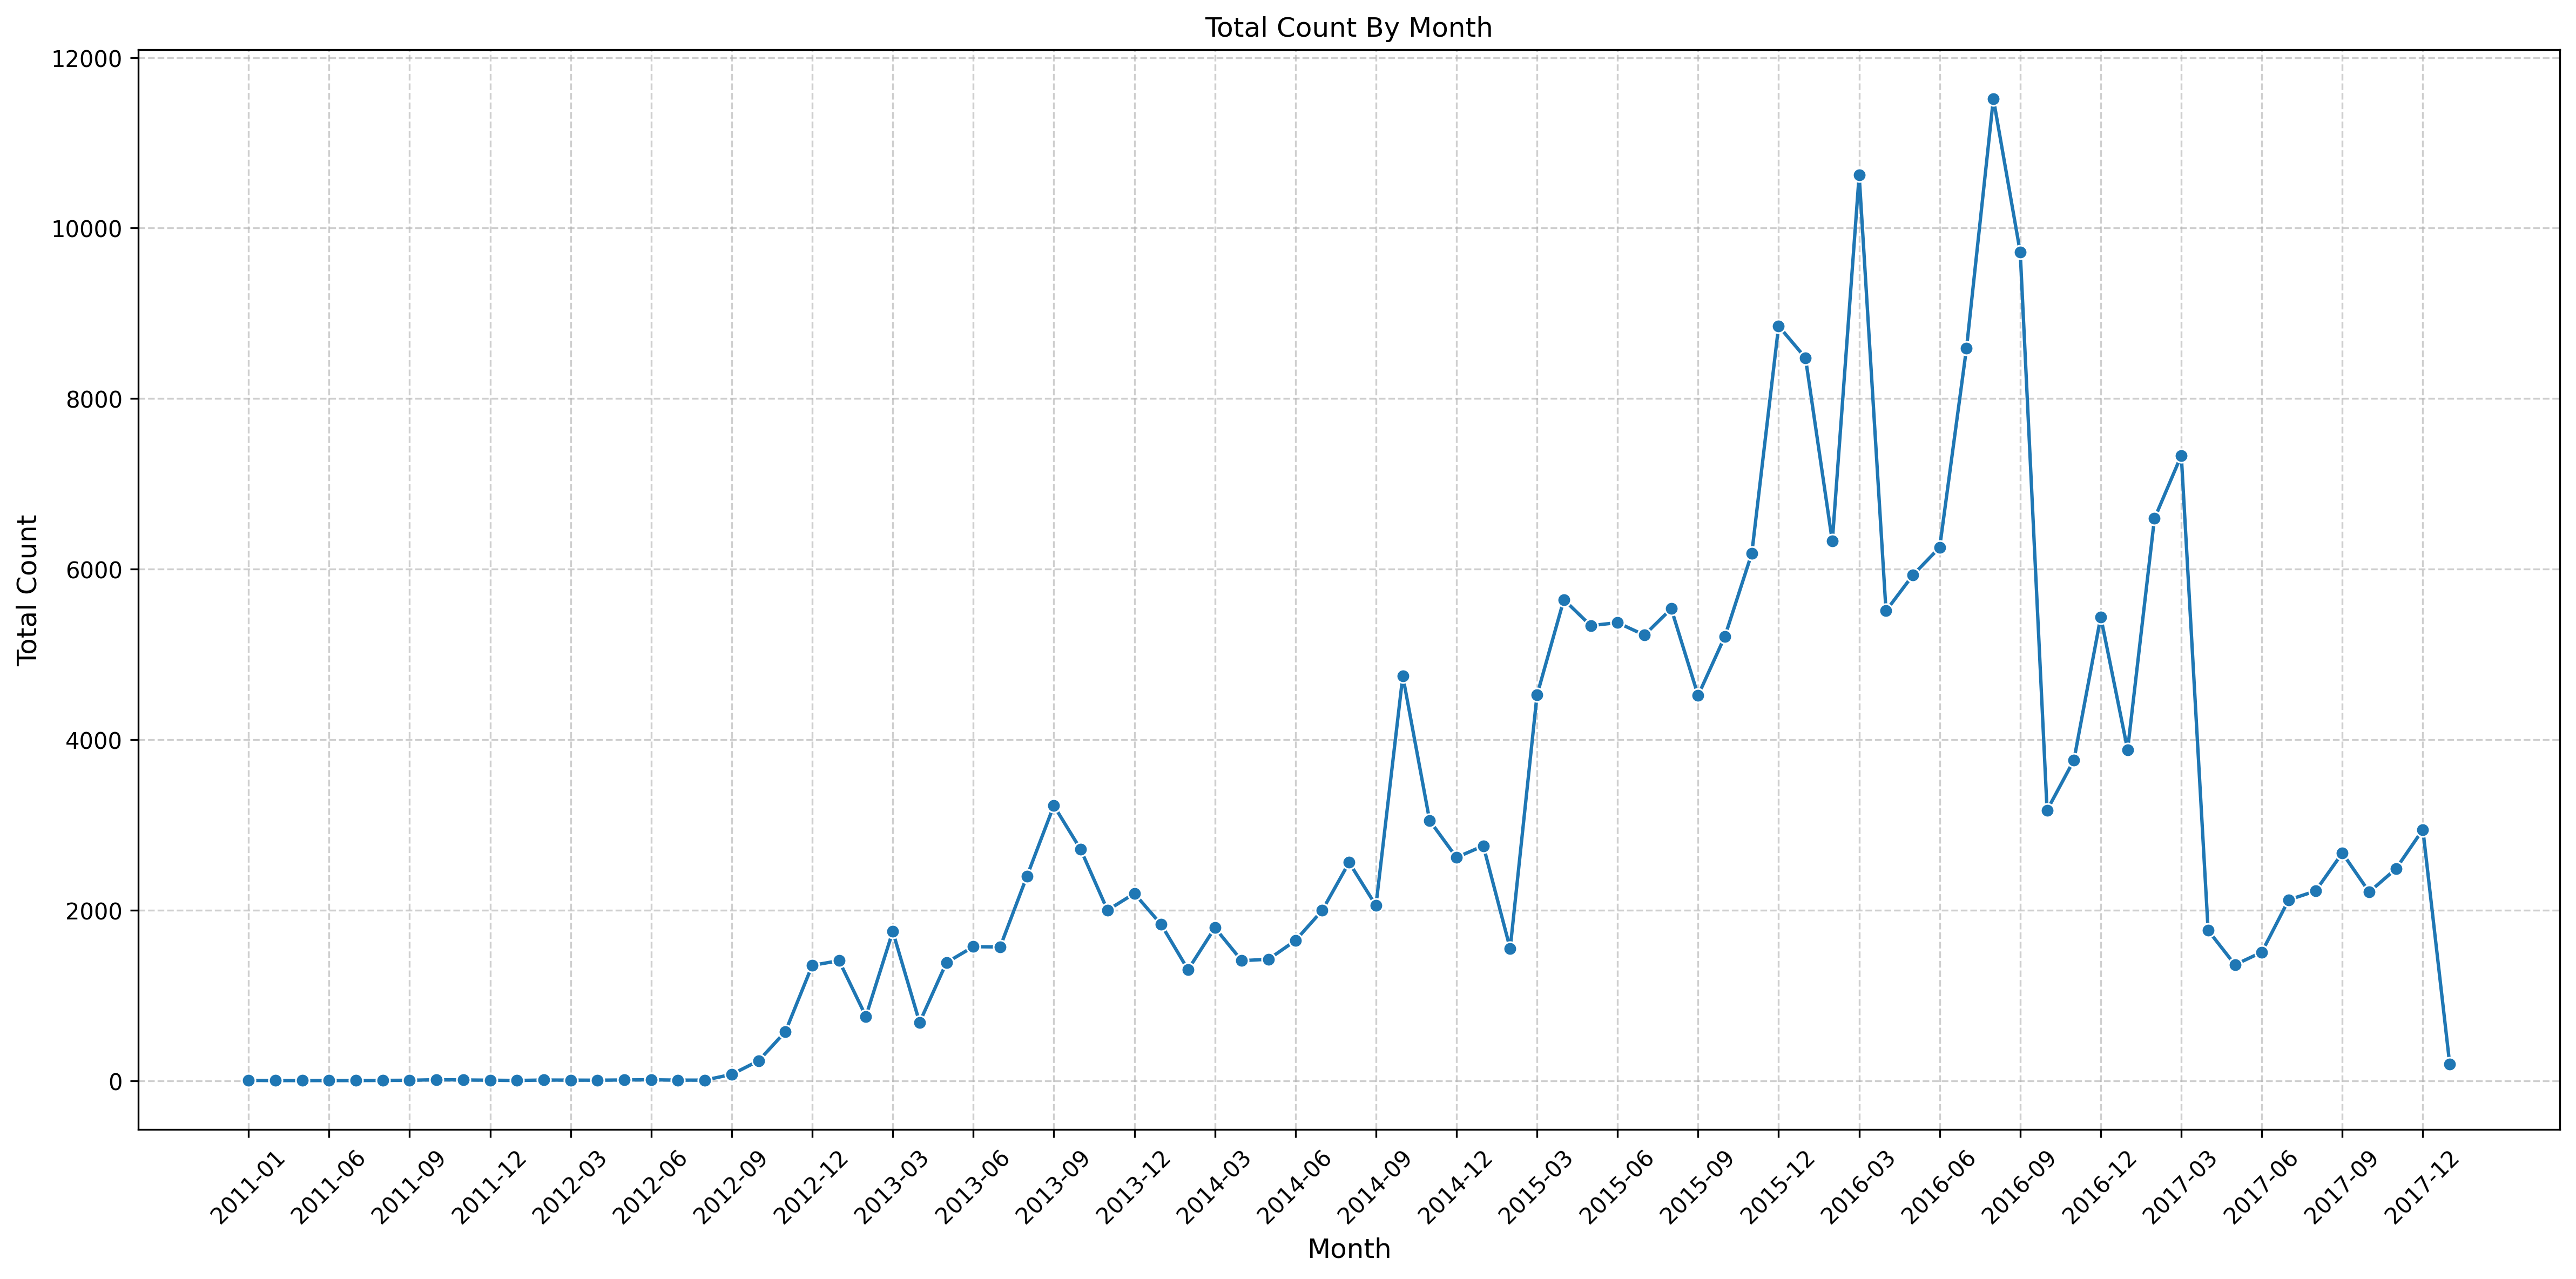

In [151]:
plt.figure(figsize=(16, 8),dpi=300)
sns.lineplot(data=data2, x='time_by_month', y='total_count', marker ='o')
plt.title('Total Count By Month')
plt.xlabel('Month',fontsize=12)
plt.xticks(data2['time_by_month'][::3],rotation=45)
plt.ylabel("Total Count", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

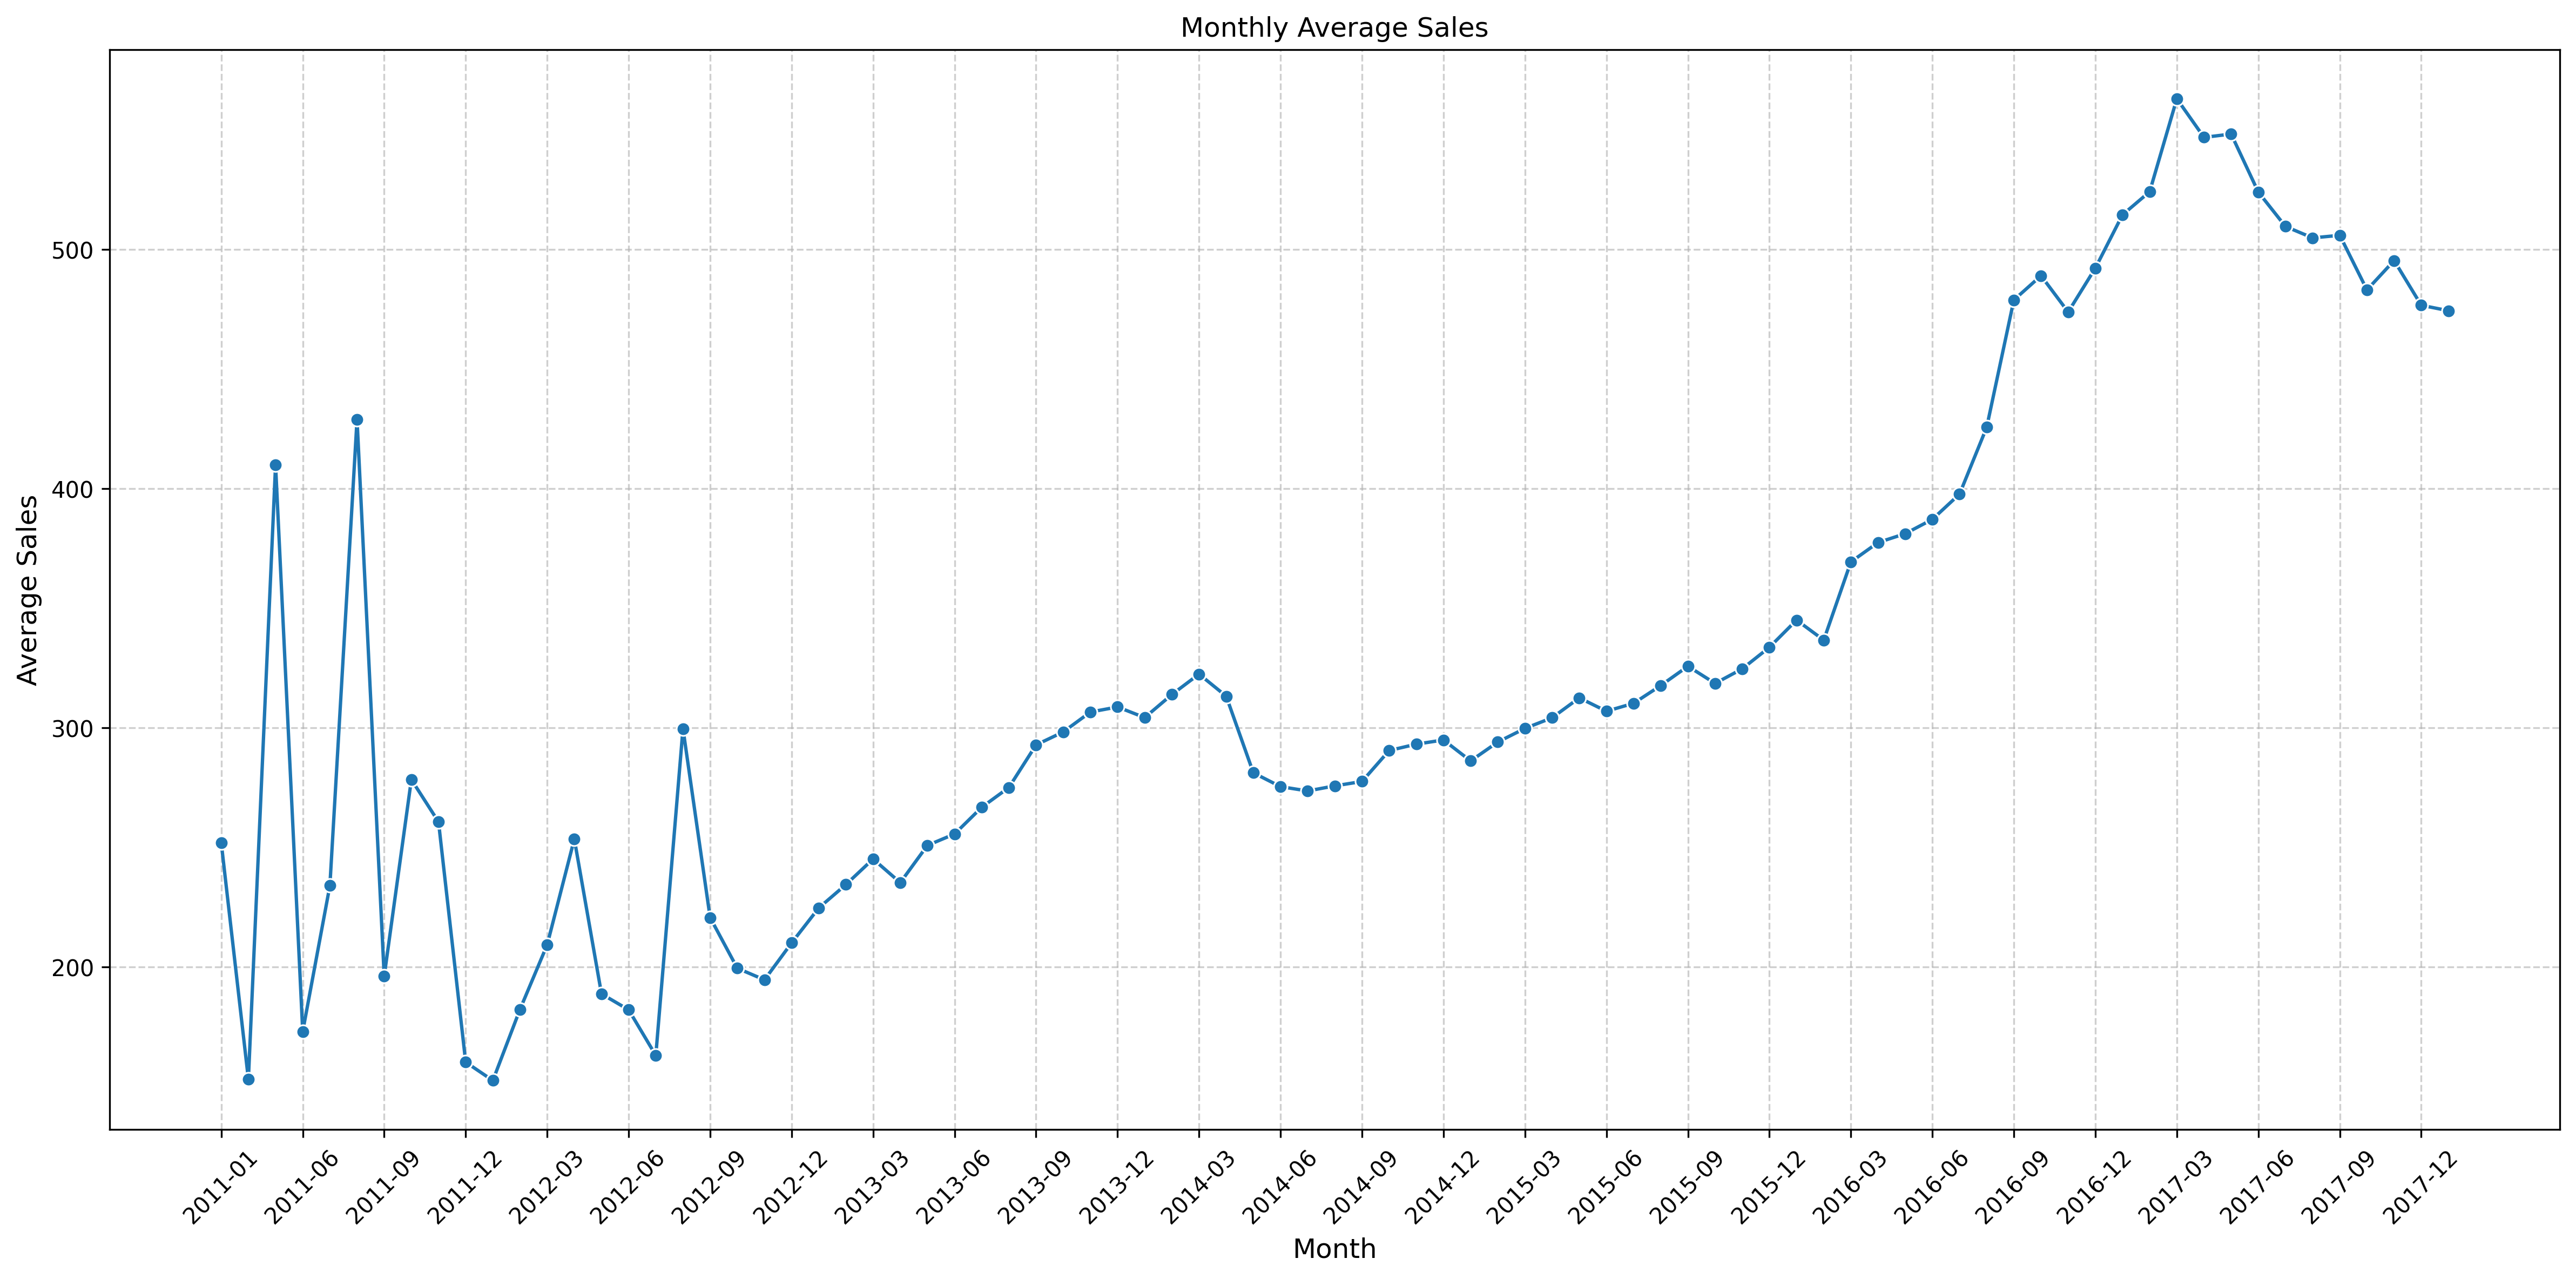

In [150]:
plt.figure(figsize=(16, 8),dpi=300)
sns.lineplot(data=data2, x='time_by_month', y='average', marker ='o')
plt.title('Monthly Average Sales')
plt.xlabel('Month',fontsize=12)
plt.xticks(data2['time_by_month'][::3],rotation=45)
plt.ylabel("Average Sales", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [115]:
data3 = data.groupby(by='time_by_year')['price_per_square'].agg(
    average='mean'
).reset_index()
data3['time_by_year']=data3['time_by_year'].astype(str)

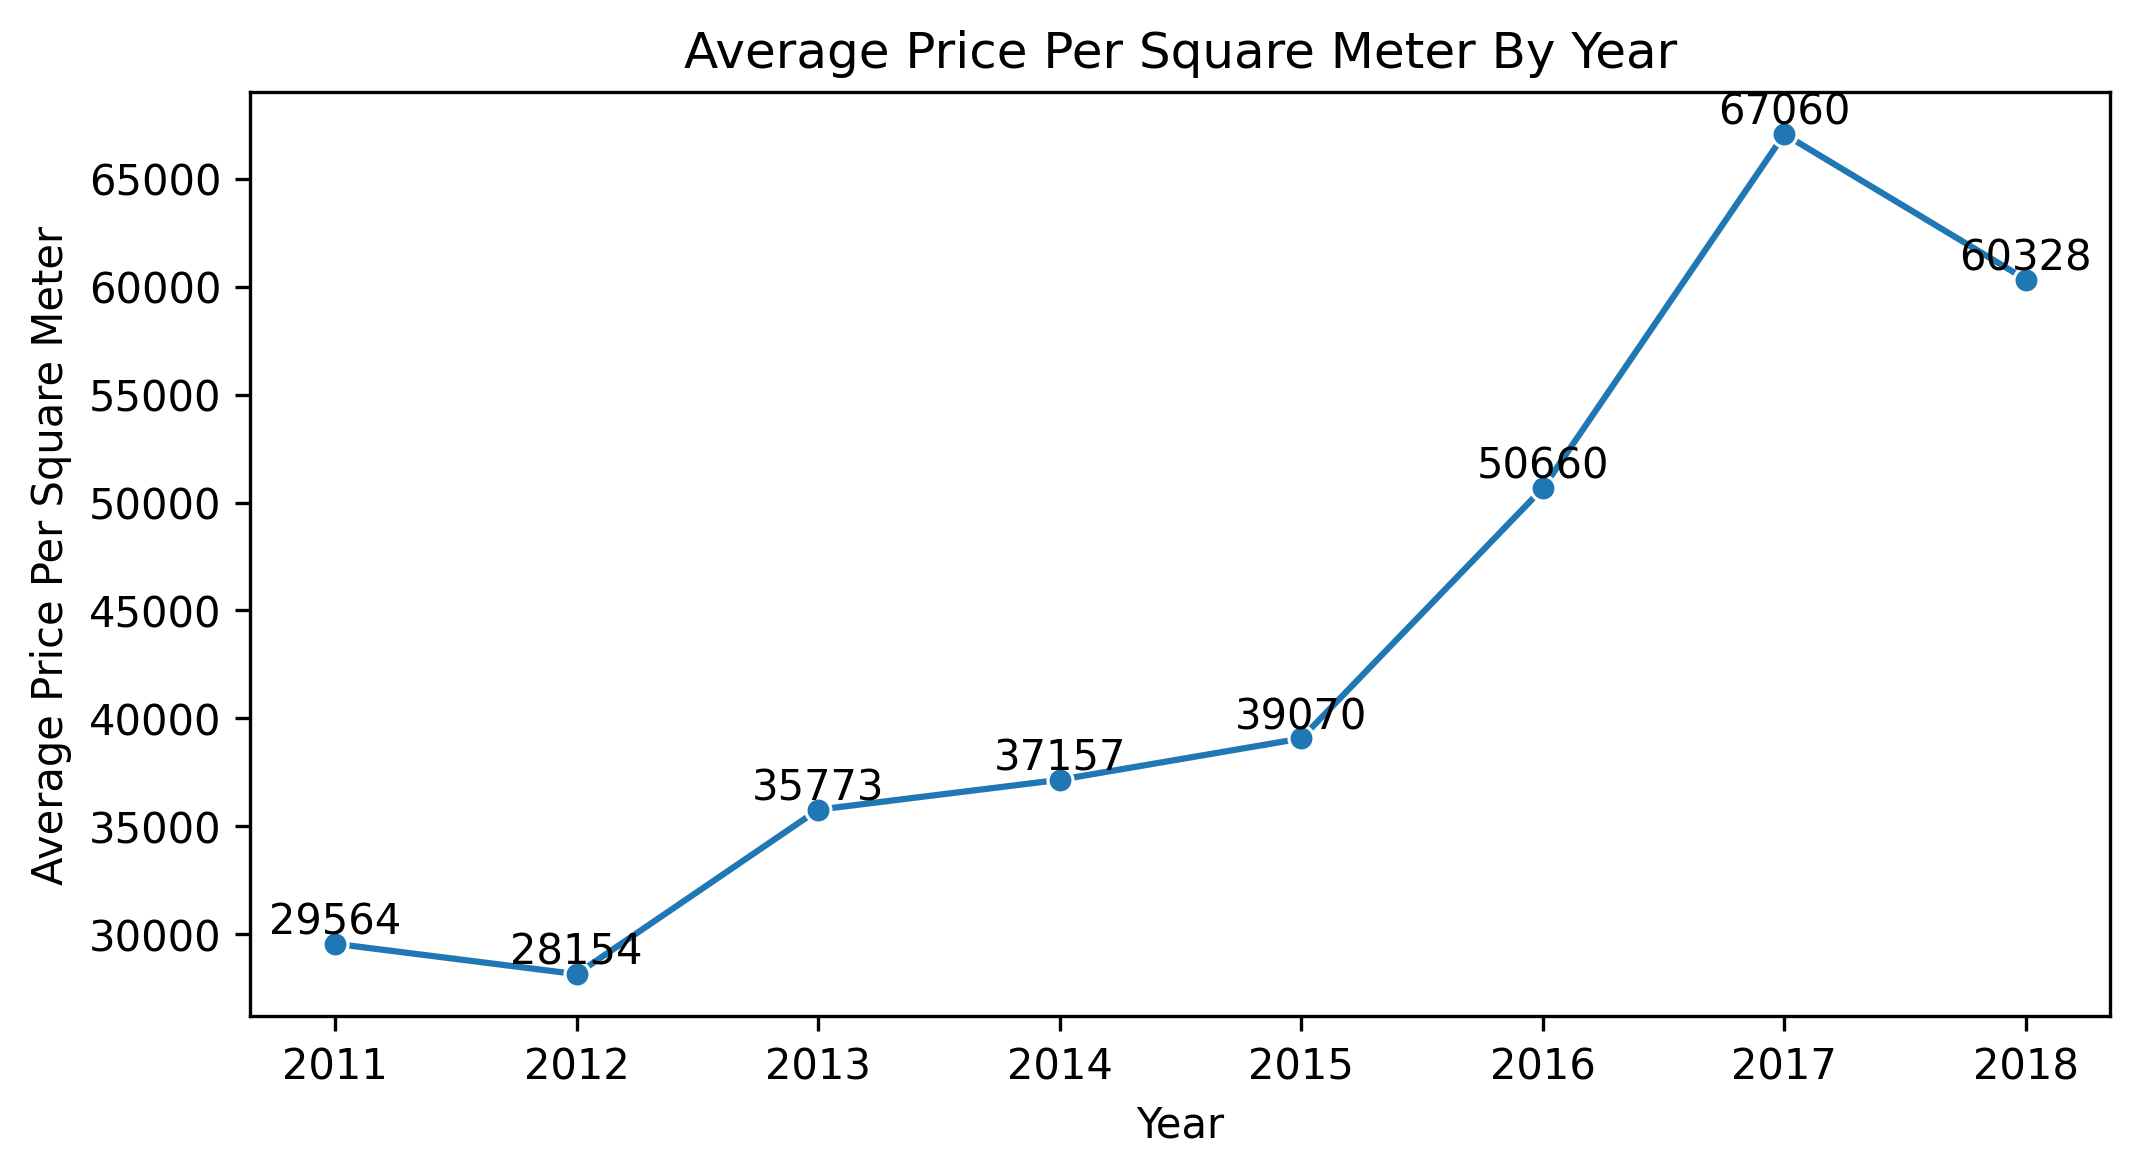

In [139]:
plt.figure(figsize=(8, 4), dpi=300)
lineplots = sns.lineplot(x='time_by_year',
                         y='average',
                         data=data3,
                         linestyle='-',
                         marker='o',
                         markersize = 6)
for x,y in zip(data3['time_by_year'], data3['average']):
    plt.text(x, y+2000, f'{y:.0f}', fontsize = 10, ha='center', va='top',color = 'black')
plt.title('Average Price Per Square Meter By Year')
plt.ylabel('Average Price Per Square Meter')
plt.xlabel('Year')
plt.show()

In [142]:
data4 = data.groupby(by=['time_by_month'])['price_per_square'].agg(average = 'mean').reset_index()

In [143]:
data4['time_by_month'] = data4['time_by_month'].astype(str)

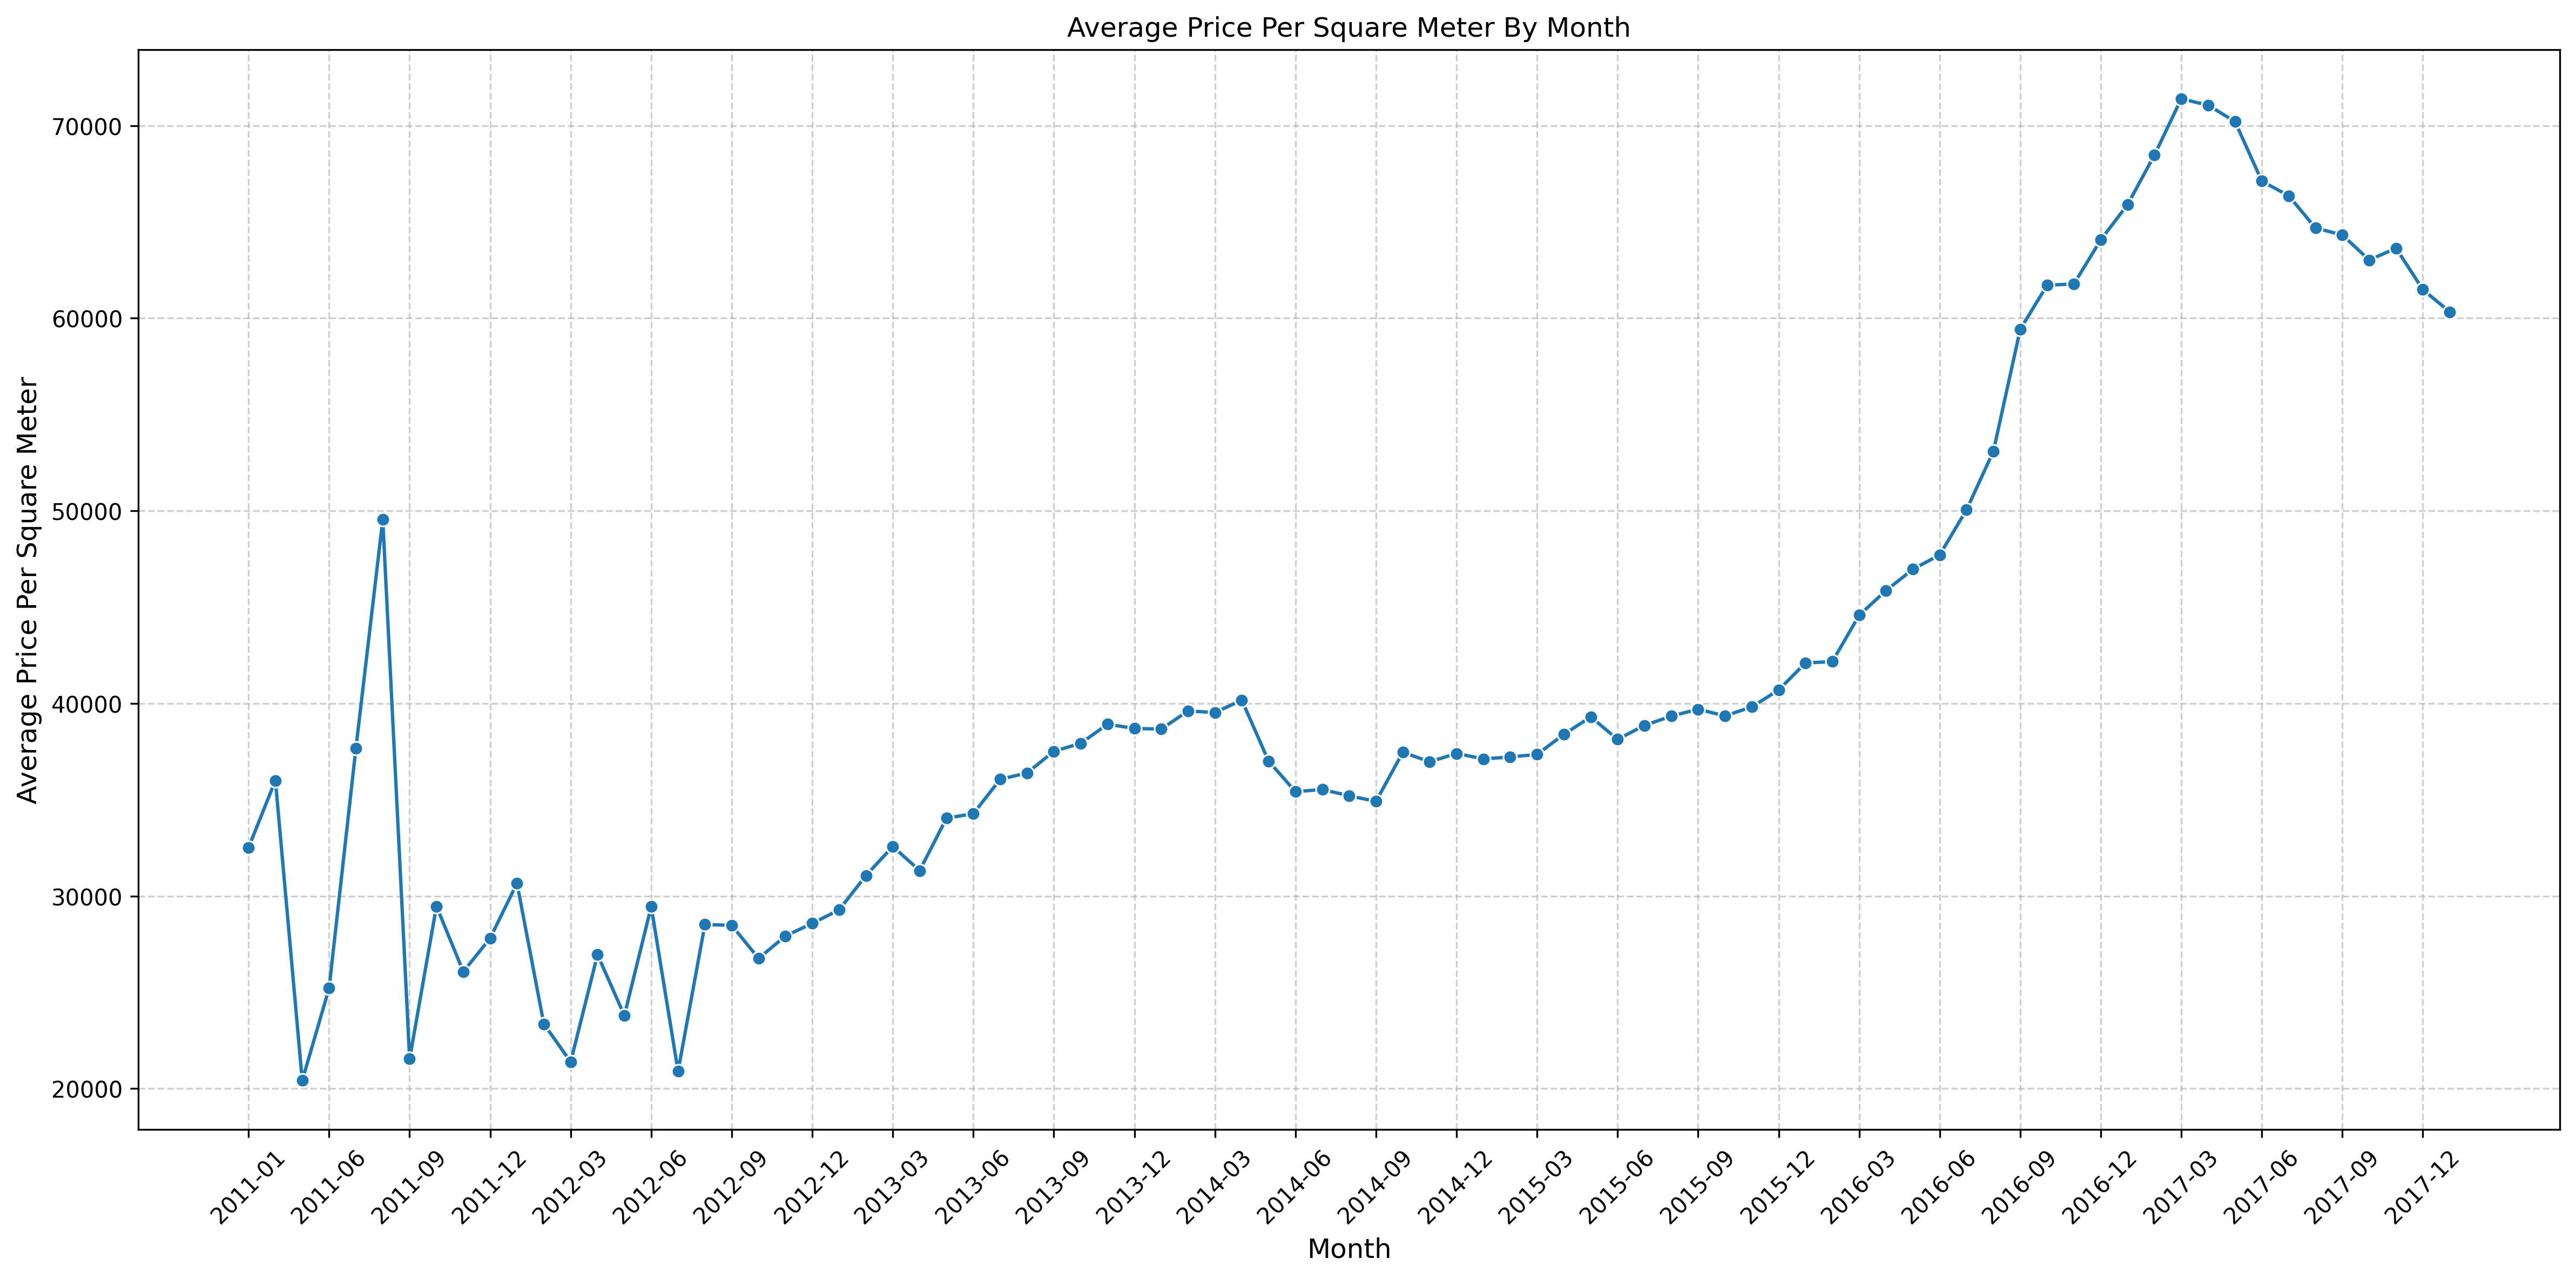

In [144]:
plt.figure(figsize=(16, 8), dpi=300)
lineplots = sns.lineplot(x='time_by_month',
                         y='average',
                         data=data4,
                         linestyle='-',
                         marker='o',
                         markersize = 6)
plt.title('Average Price Per Square Meter By Month')
plt.xlabel('Month',fontsize=12)
plt.xticks(data2['time_by_month'][::3],rotation=45)
plt.ylabel("Average Price Per Square Meter", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()